# MTH 651: Advanced Numerical Analysis

## Lecture 2

### Topics

* Variational form of the governing equations
* Finite element formulation in 1D
* Proof of accuracy
  * $L^2$ norm
  * max-norm

#### Textbook references

Sections 0.1, 0.2, 0.3, 0.4, 0.5, 0.7

### Variational form of the equations

Recall our model problem on $\Omega = [0,1]$
$$ \tag{$*$}
\left\{
   \begin{aligned}
      -u''(x) &= f(x) \\
      u(0) &= 0 \\
      u(1) &= 0
   \end{aligned}
\right.
$$

> **_NOTE:_**  The textbook considers slightly different boundary conditions. It will not make a big difference in what follows.

Let $u$ be the solution to $(*)$ defined above.

Let $v$ be a **test function**, i.e. any sufficiently smooth function such that $v(0) = v(1) = 0$.

Certainly, multiplying the equation $-u''(x) = f(x)$ by $v$ and then integrating gives
$$
   -\int_0^1 u''(x) v(x) \, dx = \int_0^1 f(x) v(x) \, dx
$$
Integrating the left-hand side by parts gives
$$ \tag{$**$}
   \int_0^1 u'(x) v'(x) \, dx = \int_0^1 f(x) v(x) \, dx
$$
Note that the boundary term $[-u'(x) v(x)]_0^1$ vanishes because $v$ is zero at both endpoints.

> **_NOTATION:_** We will write $(f, g)$ to denote the integral
> $$ (f, g) = \int_0^1 f(x) g(x) \, dx $$
> This is known as the $L^2$ inner product.

> **_DEFINITION:_** Let $a(u,v)$ denote the **bilinear form** defined by
> $$ a(u,v) = \int_0^1 u'(x) v'(x) \,dx $$

From equation $(**)$, we can write the equation as
$$ \tag{VF}
   a(u, v) = (f, v)
$$
for all test functions $v$ (in some appropriate space $V$).
This is known as the **variational form** (or weak form) of the equation (because the test function $v$ is allowed to vary).

Do we know that the variational form is equivalent to our original equation? It is clear that the differential equation $(*)$ implies the variational form $({\rm VF})$ (we derived this above), but what about the converse?

> **_THEOREM:_** Let $f \in C^0([0,1])$ and suppose that $u \in C^2([0,1])$ where $u(0) = u(1) = 0$ satisfies $({\rm VF})$.
> Then, $u$ solves $(*)$.

> _Proof._
> Let $v \in C^1([0,1])$ with $v(0) = v(1) = 0$.
>
> From $({\rm VF})$ we have that, integrating by parts,
> $$ (f, v) = a(u, v) = - \int_0^1 u''(x) v(x) \, dx = (-u'', v) $$
>
> Therefore, $(f + u'', v) = 0$ for all such test functions $v$.
>
> We wish to show $f + u'' = 0$ (which would imply $(*)$).
> Suppose to the contrary that $f + u'' \not\equiv 0$.
> Then, there is some interval $[x_0, x_1] \subseteq [0,1]$ on which $f + u''$ does not change sign (i.e. it is either strictly positive or strictly negative).
>
> Let us choose the test function $v$ to be
> $$
>  v(x) = \begin{cases}
>     (x - x_0)^2(x-x_1)^2 & x \in [x_0, x_1] \\
>     0 & \text{otherwise}
>  \end{cases}
> $$
> (why is $v$ a valid test function?)
>
> Then, $(f + u'', v) \neq 0$, a contradiction.

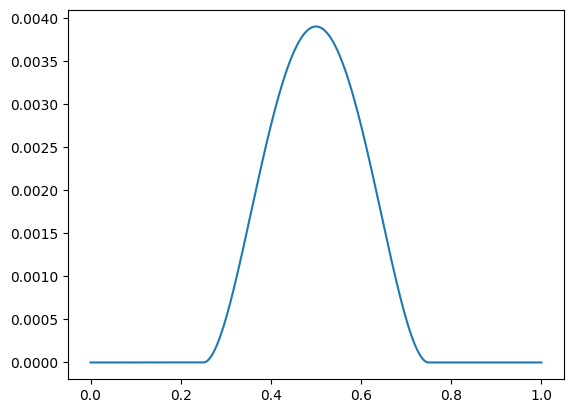

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# To illustrate the test function defined above, suppose x0 = 0.25, x1 = 0.75
x0 = 0.25
x1 = 0.75

n = 1001
x = np.linspace(0, 1, n)
y = np.zeros(n)

for i in range(n):
   if x[i] < x0:
      y[i] = 0
   elif x[i] > x1:
      y[i] = 0
   else:
      y[i] = (x[i] - x0)**2 * (x[i] - x1)**2

plt.plot(x, y)

Clearly, the test function $v(x)$ defined above satisfies $v(0) = v(1) = 0$.

We also need the condition that $v \in C^1([0,1])$, i.e. its derivative must be well-defined and continuous.

We can verify this through calculation, but let's also approximation the derivative and plot it (using which method?):

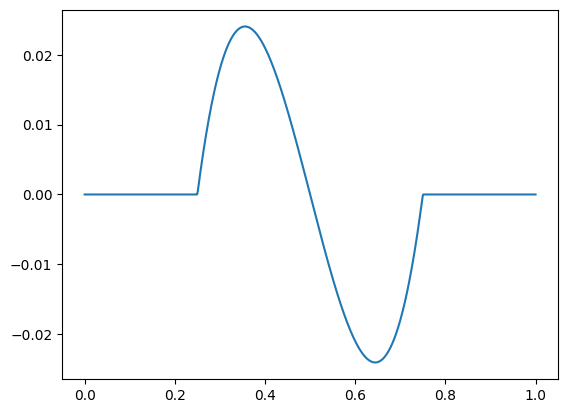

In [28]:
h = 1.0 / (n - 1)
dy = np.zeros(n)
for i in range(n):
   if i == 0:
      yL = 0.0
   else:
      yL = y[i-1]
   if i == n-1:
      yR = 0.0
   else:
      yR = y[i+1]
   dy[i] = (yR - yL) / (2*h)

plt.plot(x, dy)

In other words, instead of solving $(*)$, we could _equivalently_ solve the variational (weak) form:

> Find $u \in C^2([0,1])$ with $u(0) = u(1) = 0$ such that for all test functions $v \in C^1([0,1])$ with $v(0) = v(1) = 0$
> $$ a(u,v) = (f, v) $$

### Galerkin Approximation

The variational form defined above gives an incredibly straightforward and systematic way of discretizing the equation $(*)$.

We solve the variational form $({\rm VF})$, but simply take $u, v \in S$ for some **finite dimensional** function space $S$ (the space $S$ is a subspace of $V$, which is the space of sufficiently regular functions with $v(0) = v(1) = 0$ — we will make "sufficiently regular" precise later).
That will result in a finite dimensional system of equations that can be solved e.g. on a computer.
The discretization reads:

> Find $u_S \in S$ such that $a(u_S, v) = (f, v)$ for all $v \in S$.

Do we know that a (unique) solution to the above problem exists?

> **_THEOREM:_** Given $f \in L^2([0,1])$, the above problem has a unique solution in $S$.

> _Proof._
> Let $\{ \phi_i : 1 \leq i \leq n \}$ be a basis for the $n$-dimensional space $S$.
>
> Then,
> * $u_S = \sum_{i=1}^n U_i \phi_i$
> * $K_{ij} = a(\phi_i, \phi_j)$
> * $F_i = (f, \phi_i)$
>
> Define the vectors and matrices
> * $\boldsymbol U = (U_i)$
> * $\boldsymbol K = (K_{ij})$
> * $\boldsymbol F = (F_i)$
>
> The variational problem in $S$ is equivalent to the linear system of equations
> $$ \boldsymbol K \boldsymbol U = \boldsymbol F $$
>
> We want to show that this system has a unique solution, i.e. that the matrix $\boldsymbol K$ is **nonsingular**.
> Assume to the contrary that $\boldsymbol K$ is singular, i.e. $\boldsymbol K \boldsymbol V = \boldsymbol 0$ for some $\boldsymbol V \neq \boldsymbol 0$.
>
> The vector $\boldsymbol V$ corresponds to a function $v = \sum_{i=1}^N V_i \phi_i$ and $\boldsymbol K \boldsymbol V = \boldsymbol 0$ is equivalent to $a(v, \phi_i) = 0$ for all $i$.
>
> Consequently, we also have $a(v, v) = 0$. (Why?) This implies that
> $$ \int_0^1 v'(x) v'(x) \,dx = \int_0^1 (v'(x))^2 = 0 $$
> which means that $v' \equiv 0$.
>
> Thus, $v$ is constant, but since $v \in S \subseteq V$, and all functions in $V$ satisfy the BCs $v(0) = v(1) = 0$, we have that $v \equiv 0$.
>
> Therefore, $\boldsymbol V = \boldsymbol 0$, a contradiction, and so $\boldsymbol K$ must be nonsingular, and a unique solution exists.

Some remarks:

* $\boldsymbol K$ is known as the **stiffness matrix** (this name comes from structural mechanics, but it is commonly used in other application areas)
* $\boldsymbol K$ is **symmetric** and **positive-definite** (spd)
   * This follows from symmetry and positive-definiteness of the bilinear form $a(\cdot, \cdot)$

### Error estimates

One of the "selling points" of the finite element method mentioned previously is that it is amenable to analysis.
Let's try to estimate the error incurred by solving the finite-dimensional problem in $S$ rather than the full infinite-dimensional problem $({\rm VF})$.

Define the **error** by $e = u - u_S$.

> **_GALERKIN ORTHOGONALITY:_** the error $e$ is orthogonal (in terms of the bilinear form $a$) to any $v \in S$
>
> _Proof._ We have both $a(u, w) = (f, w)$ ($u$ is the exact solution to $({\rm VF})$) and $s(u_S, w) = (f, w)$ (by definition of $u_S$). Subtracting these two gives the result.

> **_DEFINITION:_** Define the **energy norm** $\| v \|_E$ by
> $$ \| v \|_E = \sqrt{ a(v, v) } $$

Recall the Cauchy-Schwarz inequality
$$
   | a(v, w) | \leq \| v \|_E \| w \|_E
$$
Then, adding and subtracting $v \in S$
$$
\begin{align*}
   \| u - u_S \|_E^2
      &= a(u - u_S, u - u_S) \\
      &= a(u - u_S, u - v) + a(u - u_S, v - u_S) \\
      &= a(u - u_S, u - v) \quad\text{by Galerkin orthogonality} \\
      &\leq \| u - u_S \|_E \| u - v \|_E \quad\text{by Cauchy-Schwarz}
\end{align*}
$$
We obtain
$$
   \| u - u_S \|_E \leq \| u - v \|_E,
$$
but $v$ was arbitrary, so $u_S$ **minimizes the error** (in the energy norm) among all possible functions in $S$.

We are also interested in the error measured in the $L^2$ norm, 
$$
   \| u - u_S \| = \left(
      \int_0^1 (u - u_S)^2 \, dx
   \right)^{1/2}
$$

To translate the energy norm estimate about into a $L^2$ norm estimate, we use a **duality argument**.

Let $w$ be the solution to
$$
\left\{
   \begin{aligned}
      -w''(x) &= u(x) - u_S(x) \\
      w(0) &= 0 \\
      w(1) &= 0
   \end{aligned}
\right.
$$
Then,
$$
\begin{align*}
   \| u - u_S \|^2
      &= (u - u_S, u - u_S) \\
      &= (u - u_S, -w'') \\
      &= a(u - u_S, w) \\
      &= a(u - u_S, w - v)
\end{align*}
$$
for any $v \in S$.
Therefore,
$$
   \| u - u_S \| \leq \frac{\| u - u_S \|_E \| w - v \|_E }{ \| w'' \| }.
$$
Since this holds for all $v$, we have
$$
   \| u - u_S \| = \| u - u_S \|_E \inf_{v \in S} \frac{\| w - v \|_E}{\| w'' \|}
$$

Therefore, if $w$ can be well approximated by some element $v \in S$, then $\| w - v \|_E$ will be small, and the $L^2$ error will be much smaller than the error in the energy norm.

For now, we make the _approximation assumption_ that
$$
   \inf_{v \in S} \| w - v \|_E \leq \epsilon \| w'' \|,
$$
so
$$
   \| u - u_S \| \leq \epsilon \| u - u_S \|_E
$$
(we hope $\epsilon$ will be small).
By the same approximation assumption, we also have
$$
   \| u - u_S \|_E = \inf_{v \in S} \| u - v \|_E \leq \epsilon \| u'' \|,
$$
so, we obtain

> **$L^2$ _ERROR ESTIMATE:_**
> $$
>   \| u - u_S \| \leq \epsilon \| u - S \|_E \leq \epsilon^2 \| u'' \| = \epsilon^2 \| f \|
> $$
>
> The error in the energy norm is $\mathcal{O}(\epsilon)$ and the error in the $L^2$ norm is $\mathcal{O}(\epsilon^2)$

Note that the actual value of $\epsilon$ will depend on how we choose our finite-dimensional subspace $S$.
Ideally, we want to choose a sequence of "finer and finer" subpaces with the property that $\epsilon \to 0$ so the discrete solution will converge to the exact solution with increasing refinement.

### Piecewise linear finite element spaces

Let $0 = x_0 < x_1 < \cdots < x_n < x_{n+1} = 1$ be a partition of $[0,1]$ (in multiple dimensions we will use a **mesh**).
Let $S$ be the sapce of functions $v$ such that
* $v \in C^0([0,1])$
* $v$ restricted to each subinterval $[x_i, x_{i+1}]$ is a linear function
* $v(0) = v(1) = 0$

$S$ is a finite-dimensional function space of dimension $n$.
For $1 \leq i \leq n$, define the function $\phi_i$ by 
$$
   \phi_i(x_j) = \delta_{ij} = \begin{cases}
      1 & \quad \text{if $i=j$} \\
      0 & \quad \text{otherwise}
   \end{cases}
$$
These functions are often informally called _hat functions_.

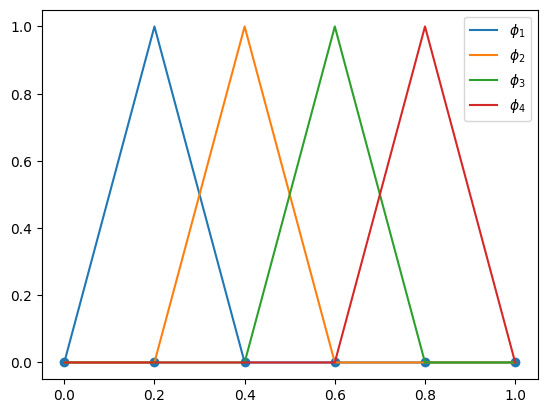

In [29]:
# Create some uniformly spaced points
n = 4
x = np.linspace(0, 1, n+2)

def phi(i):
   y = np.zeros(n+2)
   y[i] = 1
   return y

plt.scatter(x, 0*x)
plt.plot(x, phi(1), label="$\\phi_1$")
plt.plot(x, phi(2), label="$\\phi_2$")
plt.plot(x, phi(3), label="$\\phi_3$")
plt.plot(x, phi(4), label="$\\phi_4$")
plt.legend()
plt.show()

> _TERMINOLOGY:_ 
> * The points $x_i$ are called **nodes**
> * The point values $v(x_i)$ are called **nodal values**
> * The basis $\{ \phi_i \}$ is called a **nodal basis**

> **_LEMMA:_** $\{ \phi_i \}$ forms a basis for $S$

> _Proof._ 
> We show that $\{ \phi_i \}$ is linearly independent and spans $S$.
>
> Let $v(x) = \sum_{i=1}^n V_i \phi_i(x)$.
> Then, $v(x_i) = V_i$ (i.e. the coefficients $V_i$ are the nodal values of $v$).
> So, $v \equiv 0$ if and only if $V_i = 0$ for all $i$, and so $\{ \phi_i \}$ is linearly independent.
>
> Now, we show $\{ \phi_i \}$ spans $S$.
> Let $v \in V$ be arbitrary, and let $V_i = v(x_i)$.
> Then, we can verify that $v = \sum_{i=1}^n V_i \phi_i(x)$.

> _NOTE:_ For any continuous $f \in C^0([0,1])$, the function $f_I(x) \sum_{i=1}^n f(x_i) \phi_i(x)$ is called the **nodal interpolant** of $f$

What are the accuracy properties of the nodal interpolant?

> **_THEOREM:_** Let $h = \max h_i$ (where $h_i = x_i - x_{i-1}$).
> Then,
> $$ \| u - u_I \|_E \leq C h \| u'' \| $$
> for $C$ independent of $h$ and $u$.

> _Proof._ 
> It suffices to prove the result over each subinterval, i.e.
> $$
>  \int_{x_{j-1}}^{x_j} (u - u_I)'(x)^2 \, dx \leq c h_j \int_{x_{j-1}}^{x_j} u''(x)^2 \, dx
> $$
> The result will then follow by summing over $j$.
>
> Denote the error $e = u - u_I$.
> Since $u_I$ is linear on each interval, we have $u'' = e''$ on each interval.
> Then, the condition above is equivalent to
> $$
>  \int_{x_{j-1}}^{x_j} e'(x)^2 \, dx \leq c h_j \int_{x_{j-1}}^{x_j} e''(x)^2 \, dx
> $$
> We perform a change of variables,
> $$ x = x_{j-1} + h_j \tilde{x} $$
> so that this is equivalent to
> $$
>  \int_0^1 \tilde{e}'(\tilde{x})^2 \, d\tilde{x} \leq c \int_0^1 \tilde{e}''(\tilde{x})^2 \, d\tilde{x}
> $$
> where $\tilde{e}(\tilde{x}) = e(x(\tilde{x}))$.
>
> To simplify notation, write $\tilde{e}(\tilde{x}) = w(t)$.
> We have $w(0) = w(1) = 0$ since the interpolation error is zero at the nodes.
> By Rolle's theorem, $w'(\xi) = 0$ for some $\xi \in (0,1)$.
> So,
> $$ w'(y) = \int_\xi^y w''(t) \, dt $$
> Applying Cauchy-Schwarz to the right-hand side,
> $$
>  \begin{align*}
>     | w'(y) | = \left| \int_\xi^y w''(t) \, dt \right|
>        &= \left| \int_\xi^y 1 \cdot w''(t) \, dt \right| \\
>        &\leq |y - \xi|^{1/2} \left(\int_\xi^y w''(t)^2 \, dt \right)^{1/2} \\
>        &\leq |y - \xi|^{1/2} \left(\int_0^1 w''(t)^2 \, dt \right)^{1/2} \\
>        &= |y - \xi|^{1/2} \ \| w'' \|^{1/2}
>  \end{align*}
> $$
> Squaring and integrating over $y$,
> $$
>  \begin{align*}
>     \| w \|_E^2 \leq \| w'' \| \int_0^1 |y - \xi| \, dy.
>  \end{align*}
> $$
> Choosing $c$ such that $c \geq \int_0^1 (y - \xi) \, dy$ for all $\xi$, we obtain the desired result (i.e. can take $c = 1/2$).

Recall, in the abstract setting, we made the assumption about the approximation property
$$
   \inf_{v \in S} \| w - v \|_S \leq \epsilon \| w'' \|
$$
for some constant $\epsilon$.

From the above, we see that for piecewise linear finite element space, we can take $\epsilon = Ch$ by taking $v = w_I$ in the above, since we have the estimate
$$
   \| w - w_I \|_S \leq C h \| w'' \|.
$$

Therefore, the piecewise linear finite element method converges as $\mathcal{O}(h)$ in the energy norm and $\mathcal{O}(h^2)$ in the $L^2$ norm.

### Max-norm convergence

The energy norm and $L^2$ norm estimates shown above all involve _integrated_ measures of the error.
It is also interested in looking at _pointwise_ error estimates.
Can we obtain a bound on the max-norm of the error?

Let $s \in [0,1]$ be a given point.
Let us try to estimate $u(s) - u_S(s)$, the error at point $s$.
Define the _Green's function_ $g_s(x)$ by
$$
   g_s(x) = \begin{cases}
      x - s x &\quad x < z \\
      s - s x &\quad \text{otherwise}
   \end{cases}
$$
A property of the Green's function is that $a(v, g_s) = v(s)$ for any $v$.
This can be seen by computing
$$
   \begin{align*}
      a(v, g_s)
         &= \int_0^1 v'(x) g_s'(x) \, dx \\
         &= \int_0^s v'(x) g_s'(x) \, dx + \int_s^1 v'(x) g_s'(x) \, dx
   \end{align*}
$$
Integrating each of the two integrals on the right-hand side by part, the resulting term involving $g_s''(x)$ vanishes, and we are left with
$$
   [v g_s']_0^s + [v g_s']_s^1 = (1-s) v(s) - (-s)v(s) = v(s).
$$

Note that $g_s$ is **piecewise linear**, and so $g_{x_i} \in S$ for each node $x_i$.
By Galerkin orthogonality,
$$
   a(u - u_S, g_{x_i}) = 0,
$$
and so
$$
   u(x_i) - u_S(x_i) = a(u - u_S, g_{x_i}) = 0,
$$
and we see that the piecewise linear finite element approximation $u_S$ **interpolates** the exact solution at the nodes, i.e. $u_S = u_I$.
A Taylor series argument can be used to bound the max-norm error of the interpolant $u_I$, which as a result gives:

> **_THEOREM:_** $$ \| u - u_S \|_{\max} \leq C h^2 \| u'' \|_{\max}. $$